# Naive Bayes visualition on syntetic dataset

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np

In [80]:
X, y = make_classification(n_samples=400, n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, n_classes=4, random_state=200)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Visualize data

In [53]:
my_cmap = plt.cm.Accent

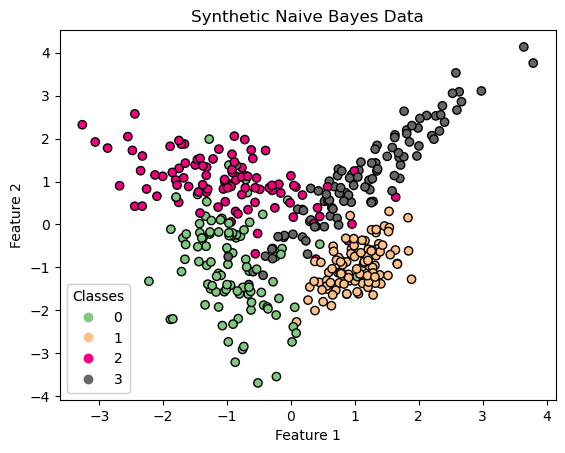

In [99]:
fig, ax = plt.subplots()

sc = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=my_cmap)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Naive Bayes Data')

legend1 = ax.legend(*sc.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

plt.show()

### Train-fit-validate

In [100]:
gnb = GaussianNB(priors=None, var_smoothing=1e-09)
gnb.fit(X_train, y_train)

nb_accuracy = gnb.score(X_test, y_test)
print(f"Accuracy: {nb_accuracy:.4f}")

Accuracy: 0.8750


In [101]:
print(gnb.class_prior_)

[0.25625 0.2625  0.2375  0.24375]


### Mesh for predictions

In [102]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

### Train data map

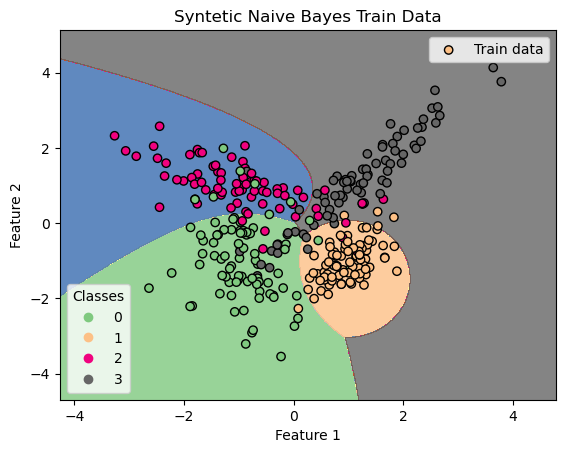

In [103]:
fig, ax = plt.subplots()

ax.contourf(xx, yy, Z, alpha=0.8, cmap=my_cmap)
sc = ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', label = "Train data", cmap=my_cmap)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Syntetic Naive Bayes Train Data')

legend1 = ax.legend(*sc.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

plt.legend()

plt.show()

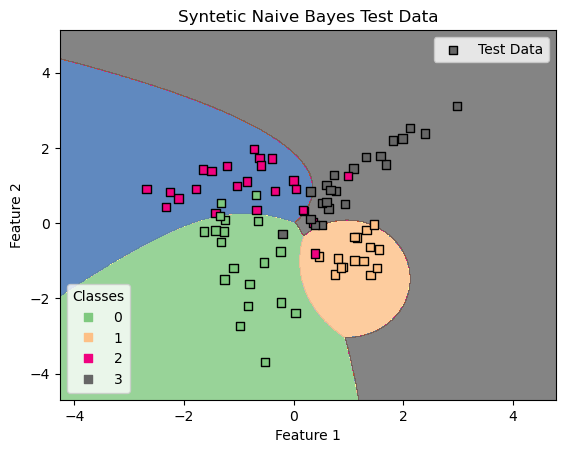

In [104]:
fig, ax = plt.subplots()

ax.contourf(xx, yy, Z, alpha=0.8, cmap=my_cmap)
sc = ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='s', label="Test Data", cmap=my_cmap)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Syntetic Naive Bayes Test Data')

legend1 = ax.legend(*sc.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

plt.legend()

plt.show()

### Repeat for skewed class_priors

In [109]:
gnb = GaussianNB(priors=[0.3,0.1,0.1, 0.5], var_smoothing=1e-09)
gnb.fit(X_train, y_train)

nb_accuracy = gnb.score(X_test, y_test)
print(f"Accuracy: {nb_accuracy:.4f}")

Accuracy: 0.8000


In [110]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

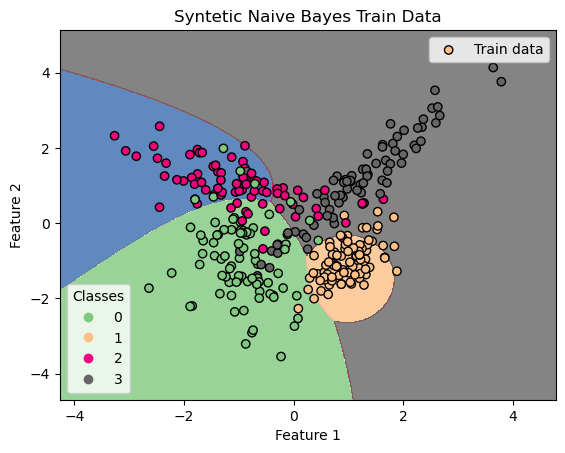

In [111]:
fig, ax = plt.subplots()

ax.contourf(xx, yy, Z, alpha=0.8, cmap=my_cmap)
sc = ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', label = "Train data", cmap=my_cmap)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Syntetic Naive Bayes Train Data')

legend1 = ax.legend(*sc.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

plt.legend()

plt.show()

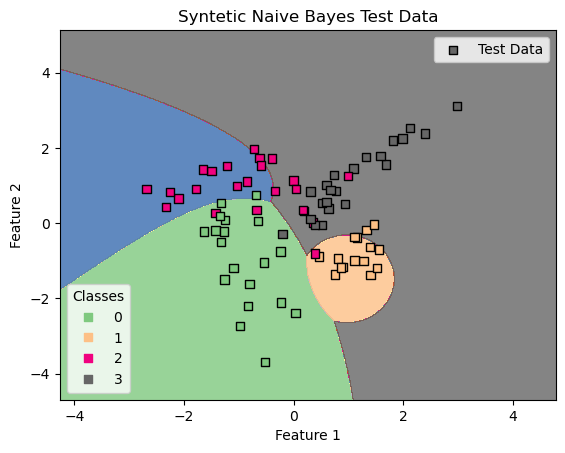

In [112]:
fig, ax = plt.subplots()

ax.contourf(xx, yy, Z, alpha=0.8, cmap=my_cmap)
sc = ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='s', label="Test Data", cmap=my_cmap)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Syntetic Naive Bayes Test Data')

legend1 = ax.legend(*sc.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

plt.legend()

plt.show()